<a href="https://colab.research.google.com/github/Baroka-wp/dive_ML/blob/master/Ecriture_et_Comprehension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## (1) Quel type de méthode existe dans le domaine de la détection d'objets ?

SPPNet (Document de référence : Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition)

SPPNet est une méthode permettant d'améliorer la précision de la reconnaissance d'images de toute taille/échelle, quelle que soit la taille de l'image d'entrée. En utilisant la couche de mise en commun des pyramides spatiales, les objets rectangulaires peuvent également être reconnus, ce qui permet de les utiliser pour la détection des objets. R-CNN (Article de référence : Contextual Action Recognition with R*CNN)

Méthode de reconnaissance d'actions humaines et d'attributs d'objets dans une image en incorporant non seulement les informations localisées de l'objet lui-même mais aussi les informations environnantes comme caractéristiques, prenant ainsi en compte le contexte et l'arrière-plan de l'image. Base de l'article

Résumé (2~3)Des avancées comme SPPnet [1] et Fast R-CNN [2] ont réduit le temps de fonctionnement de ces réseaux de détection, exposant le calcul de la proposition de région comme un goulot d'étranglement.


## 2-  Il est écrit "Plus rapide", mais quel mécanisme a été utilisé pour le rendre plus rapide ?

Le temps consacré à la proposition de région étant le principal goulot d'étranglement de la méthode conventionnelle, nous avons remplacé la méthode de proposition de région par la recherche sélective par un petit réseau convolutif appelé RPN (Region Proposal Network), et nous avons obtenu une vitesse de calcul proche du temps réel en effectuant la proposition de région et la détection d'objet sur le RPN.

Introduction:\ (page1) La dernière incarnation, Fast R-CNN [2], atteint des taux proches du temps réel en utilisant des réseaux très profonds [3], en ignorant le temps passé sur les propositions de régions.


Les méthodes de détection d'objets utilisant des réseaux neuronaux peuvent être classées en détection à une étape et détection à deux étapes, selon que la détection est effectuée en une ou deux étapes. La détection en une étape effectue la génération de BoundingBox et la prédiction de classe en une seule étape ; la détection en une étape a une structure plus simple et est censée accélérer la formation et l'inférence. La détection à une étape a tendance à être inférieure à la détection à deux étapes en termes de précision de détection. Dans la détection en deux étapes, les candidats pour les BoundingBoxes sont extraits dans la première étape. Dans la deuxième étape, la prédiction de classe et la modification de BoundingBox sont effectuées, et le résultat final de la prédiction est généré. (page10)Le chevauchement

(page10)L'article OverFeat [9] propose une méthode de détection qui utilise des régresseurs et des classificateurs sur des fenêtres glissantes sur des cartes de caractéristiques convolutionnelles. OverFeat est un pipeline de détection à une étape, spécifique à une classe, et le nôtre est une cascade à deux étapes consistant en des propositions diagnostiques de classe et des détections spécifiques à une classe. détections spécifiques. Article de référence

OverFeat : Reconnaissance, localisation et détection intégrées à l'aide de réseaux convolutifs.


## 3- Qu'est-ce que le RPN ?

RPN est un modèle d'apprentissage automatique qui peut détecter "où un objet apparaît dans une image" = "où un objet apparaît et la forme de son rectangle". Il s'agit d'un modèle d'apprentissage automatique capable de détecter "où un objet apparaît dans une image" = "où un objet apparaît et sa forme rectangulaire".

Introduction (page1)Le RPN est donc une sorte de réseau entièrement convolutif (FCN) [7] et peut être entraîné de bout en bout spécifiquement pour la tâche de générer des propositions de détection.

## 4- Qu'est-ce que le RoI pooling ?

Le RoI Pooling est chargé de donner une dimension fixe à l'entrée de la couche de classification. La carte de caractéristiques correspondant à la région de l'objet candidat est découpée par le RoI Pooling pour rendre l'extraction de caractéristiques commune et rapide. Une méthode pour fixer la dimensionnalité même lorsque la taille de l'image est différente.\ Bases de l'article

(page6) La couche de mise en commun RoI [2] du R-CNN rapide accepte les caractéristiques convolutionnelles et les boîtes limites prédites en entrée, de sorte qu'un solveur de rétropropagation théoriquement valide devrait également impliquer les gradients par rapport aux coordonnées des boîtes. Ces gradients sont ignorés dans l'apprentissage conjoint approximatif ci-dessus. Dans une solution de formation conjointe non approximative, nous avons besoin d'une couche de mise en commun des RdI qui soit différentiable par rapport aux coordonnées de la boîte.

## 5- Quelle est la taille appropriée pour l'ancre ?

Les ancres sont des rectangles qui indiquent la surface d'un objet. Elles sont générées à intervalles réguliers dans l'image et utilisées dans la fonction de perte. Dans les expériences de l'article, les modèles suivants 3 x 3 = 9 ont été utilisés.

Échelle : , , .\Rapport d'aspect : 1:1, 1:2, 2:1\ L'ancre doit être ajustée en fonction du domaine.\ (page6) Pour les ancres

(page6) Pour les ancres, nous utilisons 3 échelles avec des surfaces de boîte de 128exp(2), 256 exp(2) ,et pixels 512 exp(2), et 3 rapports d'aspect de 1:1, 1:2, et 2:1. Ces hyper- paramètres ne sont pas soigneusement choisis pour un ensemble de données particulier, et nous fournissons des expériences d'ablation sur leurs effets dans la section suivante.

## 6- Quel type d'ensemble de données est utilisé et quel type de valeur d'indice est obtenu par rapport aux recherches précédentes ?

Ensemble de données utilisé : Jeu de données MS COCO\ Résultats de la comparaison avec les études précédentes

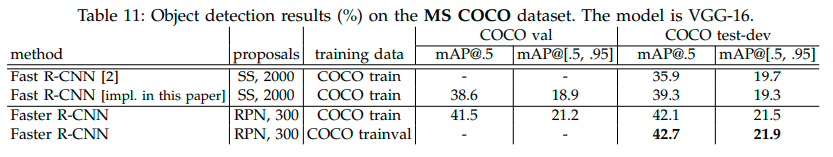